In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset_train = pd.read_csv('GOOG.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-10,56.554001,56.608501,54.056499,54.061001,54.061001,53514000
1,2018-10-11,53.646999,55.320000,53.413502,53.966000,53.966000,58980000
2,2018-10-12,55.400002,55.750000,54.320099,55.504002,55.504002,42026000
3,2018-10-15,55.445499,55.672298,54.450001,54.612499,54.612499,27448000
4,2018-10-16,55.229500,56.210999,55.125000,56.063999,56.063999,38570000


In [7]:
# Open Stock Price to train model
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 56.554001]
 [ 53.646999]
 [ 55.400002]
 ...
 [100.690002]
 [101.5     ]
 [100.650002]]
(1006, 1)


In [8]:
# Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_traing_set = scaler.fit_transform(training_set)

scaled_traing_set

array([[0.07617637],
       [0.04799914],
       [0.06499079],
       ...,
       [0.50398139],
       [0.51183261],
       [0.50359368]])

In [9]:
# X_train and y_train data structures

X_train = []
y_train = []

for i in range(60,1006):
    X_train.append(scaled_traing_set[i-60:i, 0])
    y_train.append(scaled_traing_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
print(X_train.shape)
print(y_train.shape)

(946, 60)
(946,)


In [11]:
# reshape the data 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(946, 60, 1)

In [15]:
#  Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [17]:
# Fitting Model

regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 25s 175ms/step - loss: 0.0460
Epoch 2/100
30/30 [==============================] - 5s 178ms/step - loss: 0.0080
Epoch 3/100
30/30 [==============================] - 5s 179ms/step - loss: 0.0058
Epoch 4/100
30/30 [==============================] - 6s 187ms/step - loss: 0.0064
Epoch 5/100
30/30 [==============================] - 5s 168ms/step - loss: 0.0057
Epoch 6/100
30/30 [==============================] - 6s 208ms/step - loss: 0.0056
Epoch 7/100
30/30 [==============================] - 5s 181ms/step - loss: 0.0058
Epoch 8/100
30/30 [==============================] - 5s 167ms/step - loss: 0.0054
Epoch 9/100
30/30 [==============================] - 5s 170ms/step - loss: 0.0046
Epoch 10/100
30/30 [==============================] - 5s 179ms/step - loss: 0.0050
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 0.0056
Epoch 12/100
30/30 [==============================] - 6s 186ms/step - loss: 0.0045
Epoch 13/100

30/30 [==============================] - 5s 156ms/step - loss: 0.0019
Epoch 100/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0019


In [19]:
# Extracting the Actual Stock Prices

dataset_test = pd.read_csv('GOOG.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [29]:
# Preparing the Input for the Model

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range(60, 1066):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

32/32 [==============================] - 2s 51ms/step


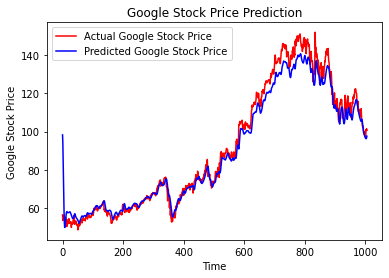

In [31]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()